In [1]:
import pandas as pd

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
#from yellowbrick.regressor import ResidualsPlot
#import seaborn as sb

import numpy as np

import os

#import tensorflow as tf
#from keras.callbacks import ModelCheckpoint
#from keras.models import Sequential
#from keras.layers import Dense, Activation, Flatten

import pickle

In [2]:
#Standartization of features aliased
stand_scaler = StandardScaler()

#Downloading data of healthy subjects
HEALTHY_DATASET_PATH = "./Datasets/Healthy/Healthy_Methylation_Dataset.csv"
healthy_df = pd.read_csv(HEALTHY_DATASET_PATH)
healthy_df.head()

,...1,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,sex,age
0,GSM507152,0.392464,0.281630,0.352591,0.315924,0.111604,0.211683,1,71.06
1,GSM507153,0.377919,0.238900,0.520396,0.323641,0.127965,0.184307,1,69.65
2,GSM507154,0.458522,0.204078,0.519273,0.363714,0.119891,0.215067,1,65.79
3,GSM507155,0.479108,0.154893,0.618859,0.493972,0.088941,0.240057,1,49.39
4,GSM507156,0.418763,0.217832,0.561005,0.398580,0.085992,0.207462,1,60.68


In [3]:
healthy_df.describe()

,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,sex,age
count,1433.000000,1433.000000,1432.000000,1433.000000,1433.000000,1433.000000,1440.000000,1342.000000
mean,0.643915,-0.034537,0.707461,0.469240,-0.126709,0.190323,0.398611,16.876972
std,0.182962,0.631238,0.181514,0.249634,0.818831,0.429598,0.489782,20.195080
min,-0.142805,-3.426375,0.249870,-0.652701,-3.671870,-1.865495,0.000000,0.000000
25%,0.508143,0.063395,0.634600,0.369900,0.038618,0.220460,0.000000,0.000000
50%,0.649500,0.093690,0.716848,0.500220,0.056750,0.295079,0.000000,9.250000
75%,0.819000,0.192362,0.791519,0.610516,0.112080,0.369000,1.000000,26.000000
max,0.981229,0.460100,1.836750,0.946000,0.308694,0.809860,1.000000,76.498290


In [4]:
healthy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ...1        1440 non-null   object 
 1   cg09809672  1433 non-null   float64
 2   cg22736354  1433 non-null   float64
 3   cg02228185  1432 non-null   float64
 4   cg01820374  1433 non-null   float64
 5   cg06493994  1433 non-null   float64
 6   cg19761273  1433 non-null   float64
 7   sex         1440 non-null   int64  
 8   age         1342 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 101.4+ KB


In [5]:
#shuffling data
healthy_df = shuffle(healthy_df)

#deleting non informative patient ID column
del healthy_df["...1"]

In [6]:
#drop the rows where at least one value is missing
healthy_df.dropna(inplace=True)

#resetting the index without the dropped rows
healthy_df.reset_index(drop=True, inplace=True)
healthy_df

,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,sex,age
0,0.833000,0.044900,0.812000,0.739000,0.019400,0.413000,1,0.000000
1,0.679760,0.073810,0.623160,0.538070,0.041990,0.312000,0,5.750000
2,0.840000,0.129000,0.721000,0.694000,0.023500,0.344000,0,0.000000
3,0.766210,0.077480,0.802110,0.602100,0.048060,0.391470,0,5.083333
4,0.455942,0.194003,0.626341,0.397848,0.070225,0.253505,1,60.880000
...,...,...,...,...,...,...,...,...
1329,0.869380,0.218710,0.597270,0.575350,0.017470,0.729360,0,0.000000
1330,0.480366,0.239414,0.563330,0.453935,0.102893,0.196226,1,60.830000
1331,0.864250,0.110180,0.594200,0.530700,0.020520,0.773990,0,0.000000
1332,0.585000,0.084690,0.701370,0.467590,0.044630,0.231450,0,15.250000


In [7]:
np.where(pd.isnull(healthy_df))

(array([], dtype=int64), array([], dtype=int64))

Correlation is a measure of linearly similar to features are. Correlation is 1 or -1 if df_1/df_2 stays constant   
Covarience is the amount of red   
correlation (similarity in change) * std_x * stx_y = covarience   
how linear are data points * average distance from the mean of x * av.d.f.t.m of y = total area of red(up looking) squares  

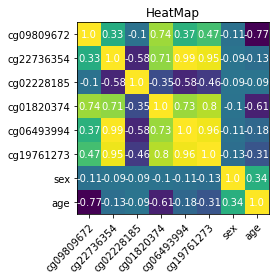

In [8]:
### Plot correlation matrix, or heatmap, to compare variables. As can 
# be seen in the lowest row (labelled age), the methylation sites
# that might act as the best predictors of age are cg09809672,
# cg01820374, and cg19761273.

#pairwise correlation of features and to the matrix
Corr_mat = healthy_df.corr()

fig, ax = plt.subplots()
im = ax.imshow(Corr_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(len(Corr_mat.columns)))
ax.set_yticks(np.arange(len(Corr_mat.columns)))
#... and label them with the respective list entries
ax.set_xticklabels(Corr_mat.columns)
ax.set_yticklabels(Corr_mat.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45,
         ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Corr_mat.columns)):
    for j in range(len(Corr_mat.columns)):
        text = ax.text(j, i, Corr_mat.iloc[i, j].round(2),
                       ha="center", va="center", color="w")

ax.set_title("HeatMap")
fig.tight_layout()
plt.show()

In [9]:
# Normalizing the methylation and sex data with a Standard Scaler.
X = healthy_df[['cg09809672', 'cg22736354', 'cg02228185', 'cg01820374', 'cg06493994', 'cg19761273', 'sex']]
print(X)
# Separating X vs. y dataframes
X_std = pd.DataFrame(stand_scaler.fit_transform(X), columns=X.columns)
y = healthy_df['age']
X_std

      cg09809672  cg22736354  cg02228185  cg01820374  cg06493994  cg19761273  \
0       0.833000    0.044900    0.812000    0.739000    0.019400    0.413000   
1       0.679760    0.073810    0.623160    0.538070    0.041990    0.312000   
2       0.840000    0.129000    0.721000    0.694000    0.023500    0.344000   
3       0.766210    0.077480    0.802110    0.602100    0.048060    0.391470   
4       0.455942    0.194003    0.626341    0.397848    0.070225    0.253505   
...          ...         ...         ...         ...         ...         ...   
1329    0.869380    0.218710    0.597270    0.575350    0.017470    0.729360   
1330    0.480366    0.239414    0.563330    0.453935    0.102893    0.196226   
1331    0.864250    0.110180    0.594200    0.530700    0.020520    0.773990   
1332    0.585000    0.084690    0.701370    0.467590    0.044630    0.231450   
1333    0.360996    0.336862    0.565143    0.250331    0.258319    0.220460   

      sex  
0       1  
1       0  
2  

,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,sex
0,0.970281,0.135932,0.503929,1.026192,0.191797,0.484004,1.197625
1,0.128742,0.180207,-0.629223,0.201535,0.218497,0.256307,-0.834986
2,1.008722,0.264729,-0.042125,0.841503,0.196643,0.328448,-0.834986
3,0.603494,0.185828,0.444583,0.464327,0.225671,0.435466,-0.834986
4,-1.100384,0.364279,-0.610135,-0.373964,0.251869,0.124433,1.197625
...,...,...,...,...,...,...,...
1329,1.170067,0.402118,-0.784578,0.354539,0.189516,1.197214,-0.834986
1330,-0.966257,0.433825,-0.988238,-0.143772,0.290480,-0.004697,1.197625
1331,1.141894,0.235907,-0.803000,0.171287,0.193121,1.297829,-0.834986
1332,-0.391646,0.196869,-0.159917,-0.087730,0.221617,0.074713,-0.834986


In [10]:
# Separating dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)